In [1]:
import sys
dirname = '/Users/m.daffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

from scipy import linalg
from smt.utils.misc import compute_rms_error

from smt.problems import Sphere, NdimRobotArm, Rosenbrock, CantileverBeam, MixedCantileverBeam, \
NdimRosenbrock, TorsionVibration, WaterFlowLFidelity, RobotArm, HierarchicalNeuralNetwork, WingWeight
from smt.sampling_methods import LHS
from smt.surrogate_models import LS, QP, KPLS, KRG, KPLSK, GEKPLS, MGP

#to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

import scipy.interpolate


import numpy as np
from sklearn.metrics import mean_squared_error

from smt.explainability_tools._partial_dependence import partial_dependence
from smt.explainability_tools._plot.partial_dependence import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


In [2]:
# ndoe = 625 #int(10*ndim)
# # fun = Rosenbrock(ndim=ndim)
# # fun = NdimRosenbrock(ndim=ndim)
# fun = WingWeight()
# sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
# X = sampling(ndoe)
# y = fun(X)

# X_tr, y_tr = X[:500, :], y[:500]
# X_te, y_te = X[500:, :], y[500:]

# X_tr_df = pd.DataFrame(X_tr)
# X_te_df = pd.DataFrame(X_te)
# y_tr_df = pd.DataFrame(y_tr)
# y_te_df = pd.DataFrame(y_te)

# X_tr_df.to_csv('../../X_tr_wing_weight.csv', index=False)
# X_te_df.to_csv('../../X_te_wing_weight.csv', index=False)
# y_tr_df.to_csv('../../y_tr_wing_weight.csv', index=False)
# y_te_df.to_csv('../../y_te_wing_weight.csv', index=False)


In [3]:
X_tr = pd.read_csv('../../X_tr_wing_weight.csv')
X_te = pd.read_csv('../../X_te_wing_weight.csv')
y_tr = pd.read_csv('../../y_tr_wing_weight.csv')
y_te = pd.read_csv('../../y_te_wing_weight.csv')
X_tr = np.array(X_tr)
X_te = np.array(X_te)
y_tr = np.array(y_tr)
y_te = np.array(y_te)

In [4]:
kriging_model = KRG(theta0=[1e-2]*X_tr.shape[1],print_prediction = False)
kriging_model.set_training_values(X_tr, y_tr)

kriging_model.train()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 500
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec): 11.6016691


In [5]:
# rf_model = RandomForestRegressor().fit(X_tr, y_tr)

In [6]:
y_pred = kriging_model.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rmse

0.04697580133054768

In [7]:
# y_pred = rf_model.predict(X_te)
# rmse = mean_squared_error(y_te, y_pred, squared=False)
# rmse

In [8]:
# model = kriging_model
# features = [0, 1, 2, 3, 8, (0, 8)]
# pd_results = partial_dependence(model, X, features, grid_resolution=20, kind="both")

In [9]:
# model = kriging_model
# features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, (0, 8)]
# pdd = PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind='both')

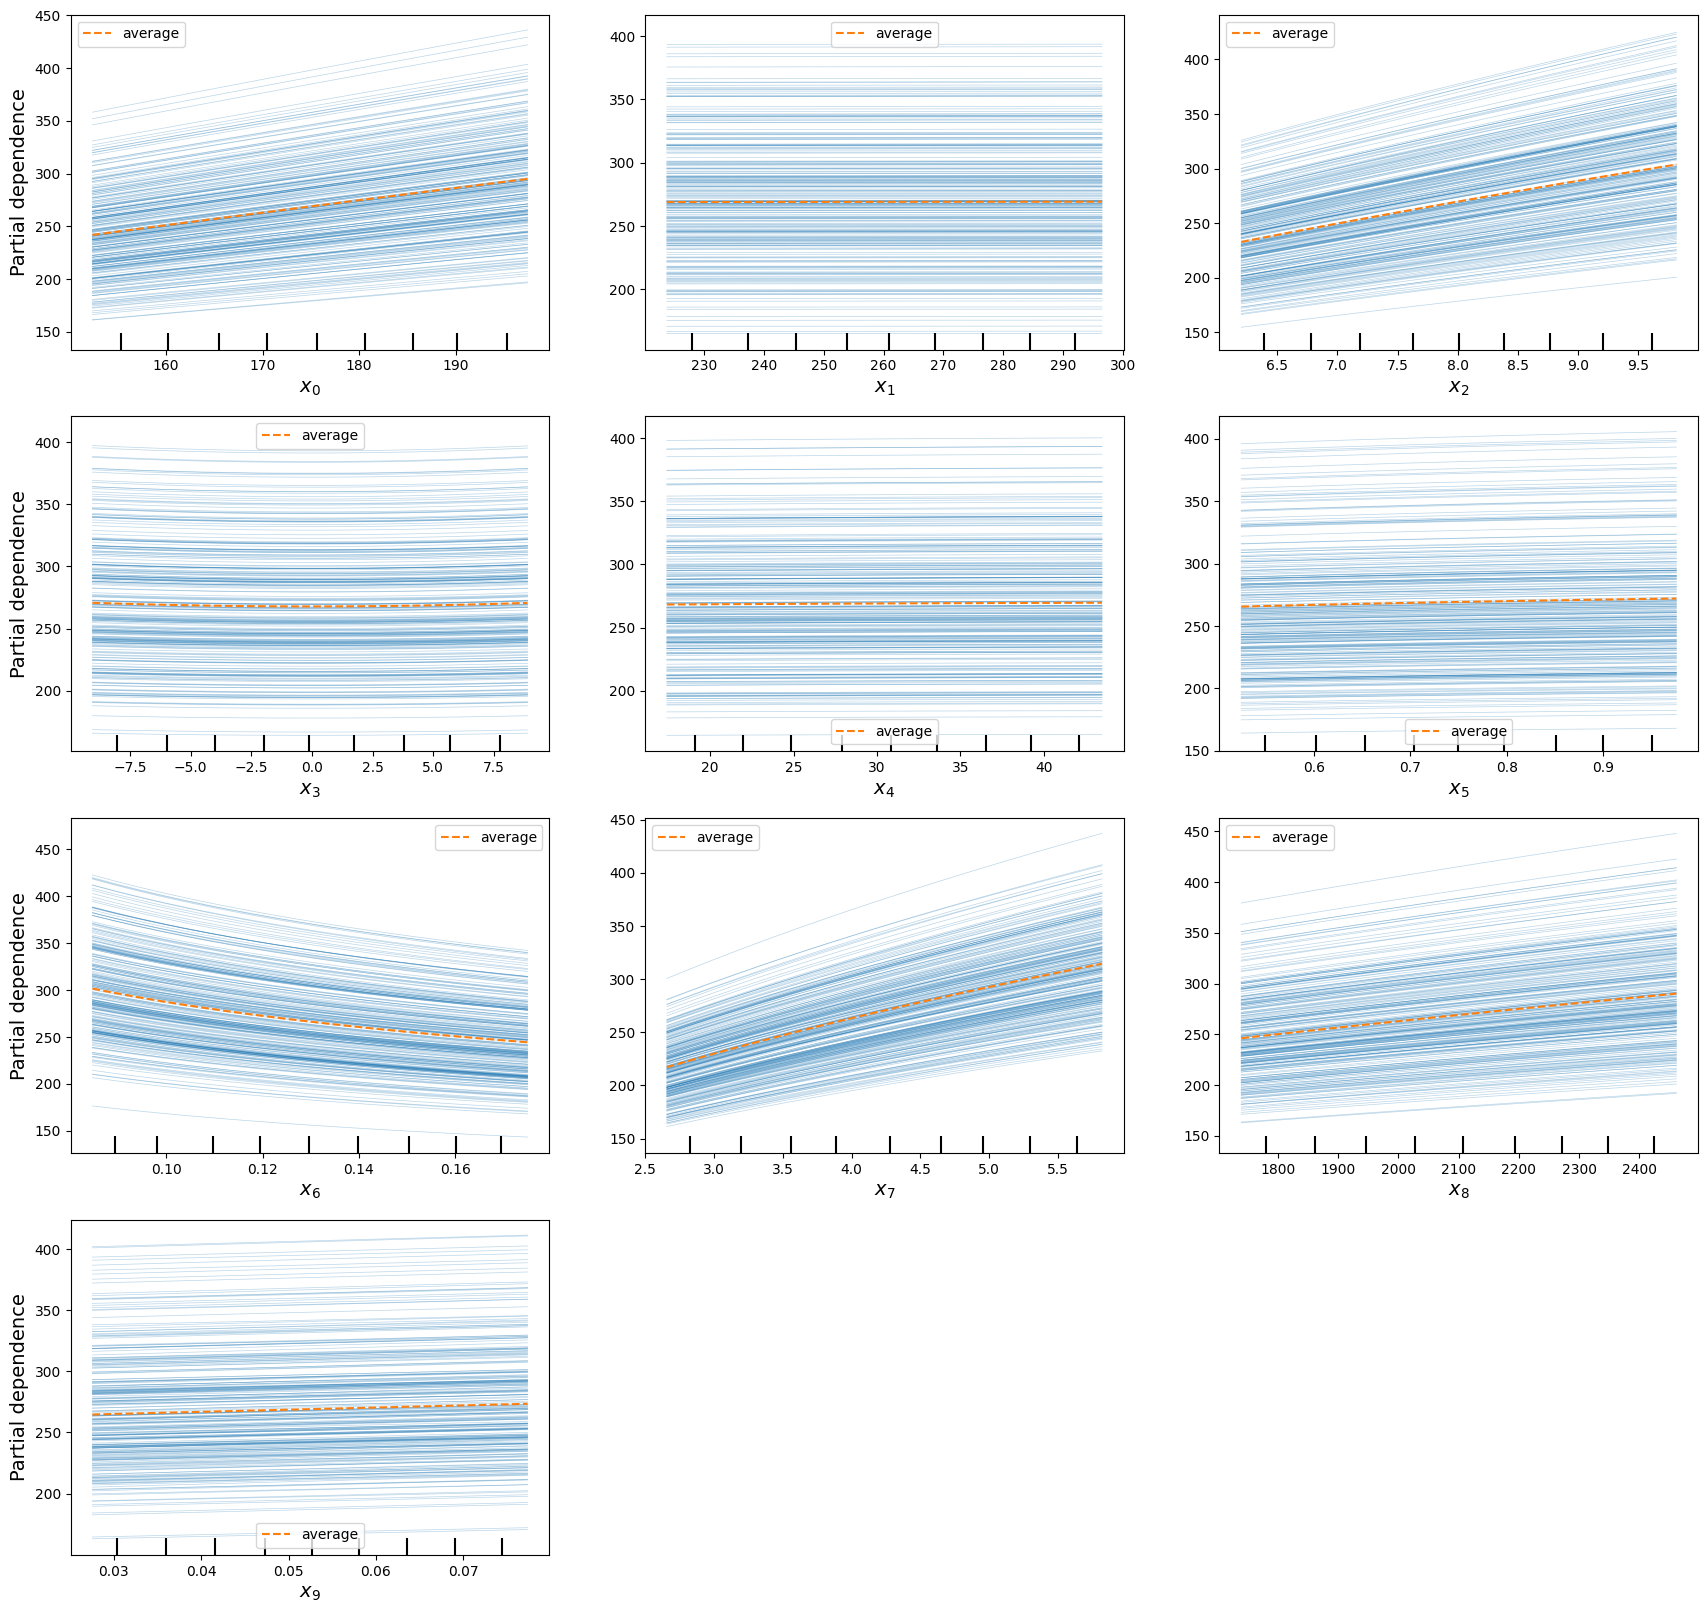

In [10]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
pdd = PartialDependenceDisplay.from_surrogate_model(model, X_tr, features, grid_resolution=20, kind='both', centered=False)

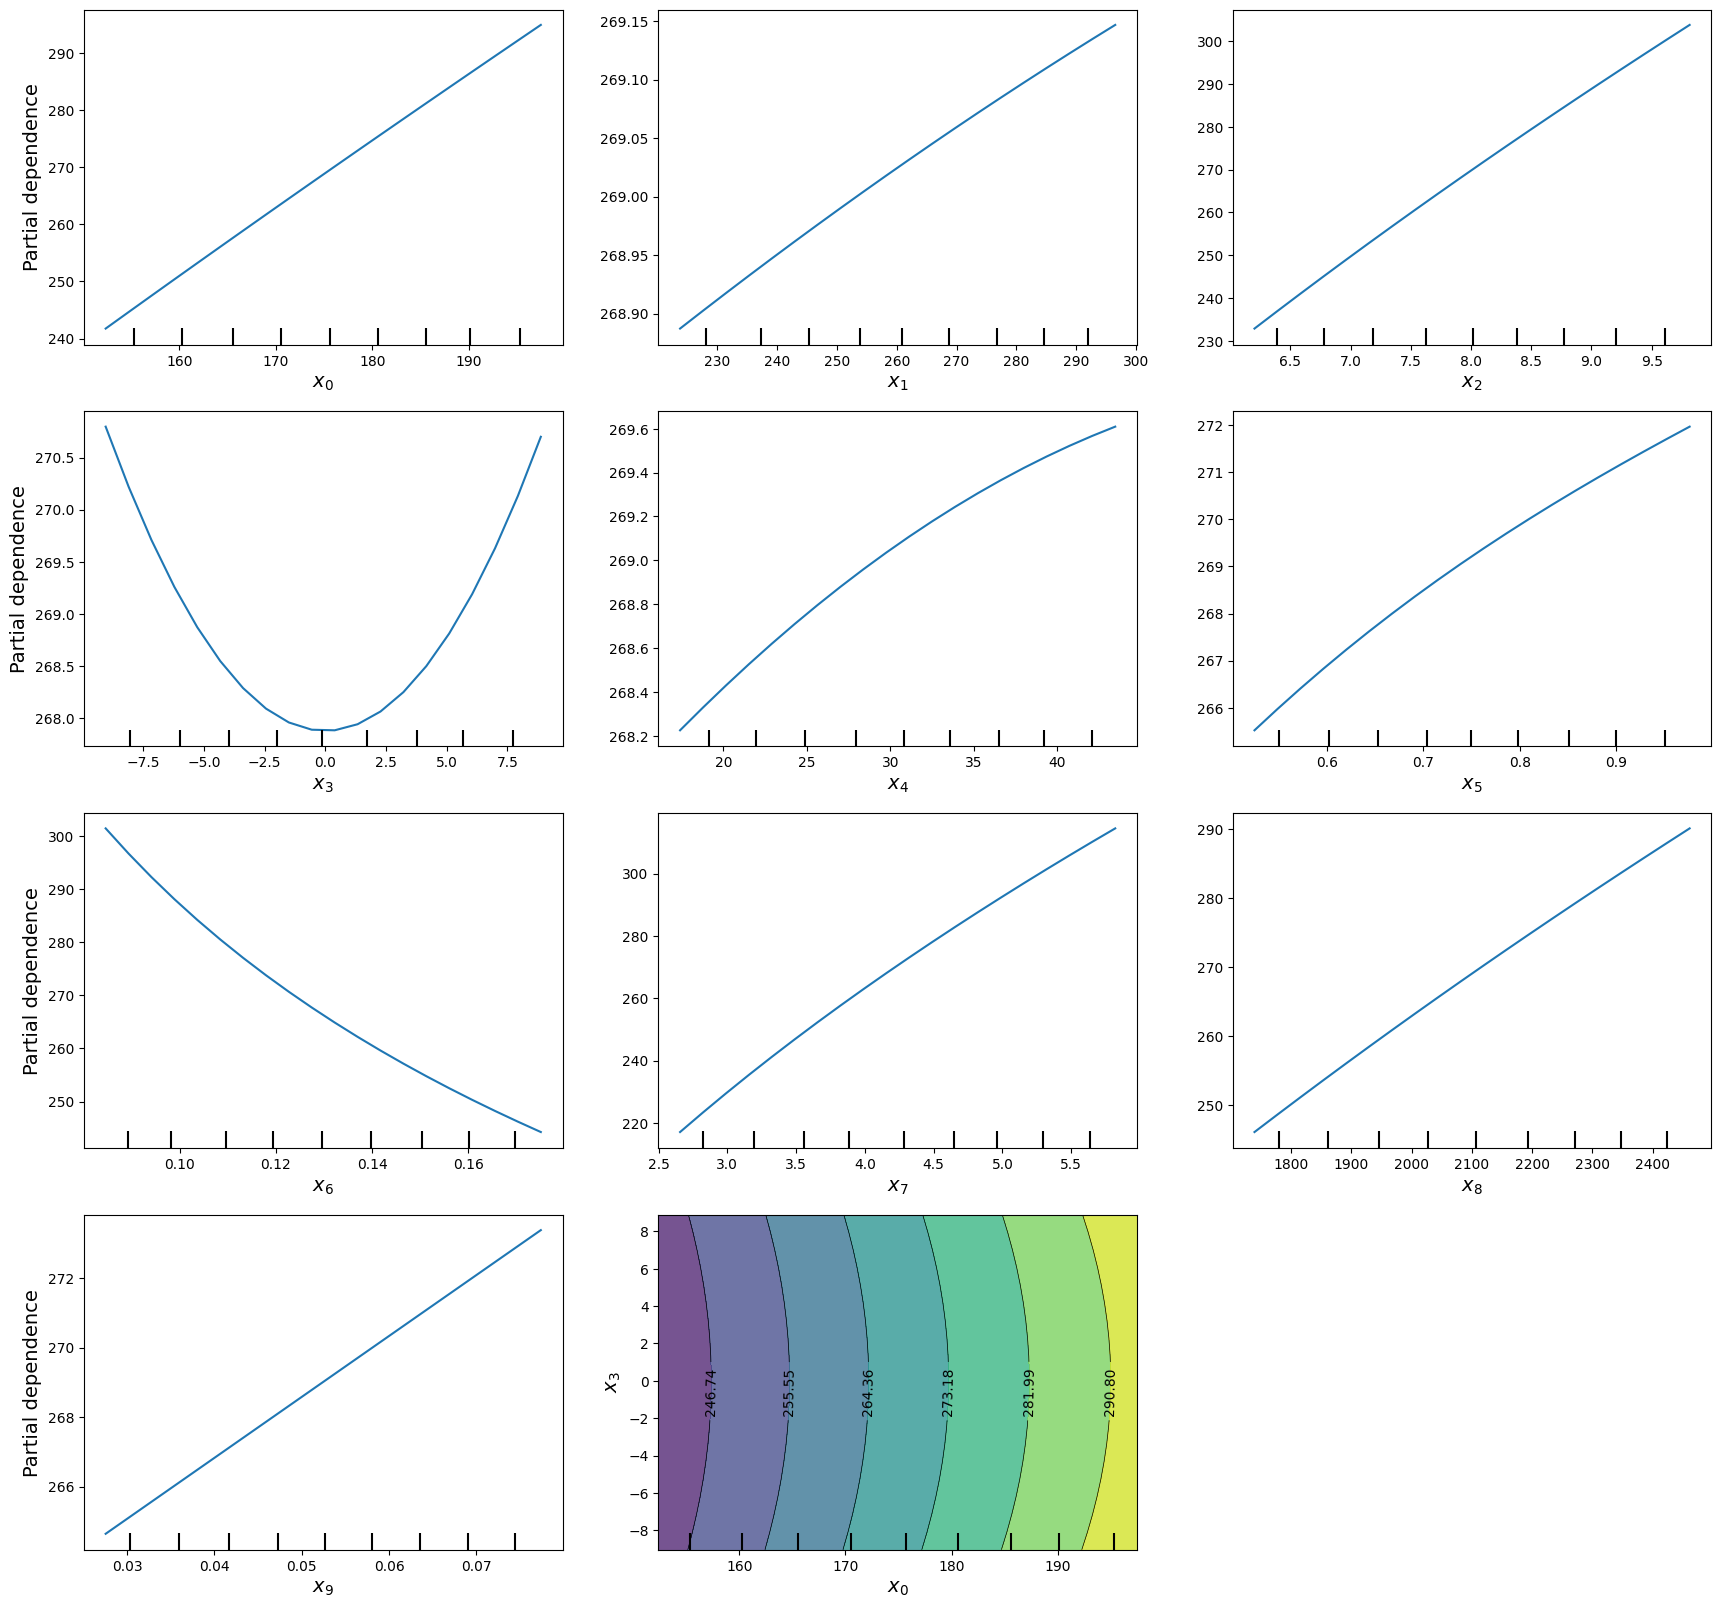

In [11]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, [0, 3]]
pdd = PartialDependenceDisplay.from_surrogate_model(model, X_tr, features, grid_resolution=20, kind='average', centered=False)

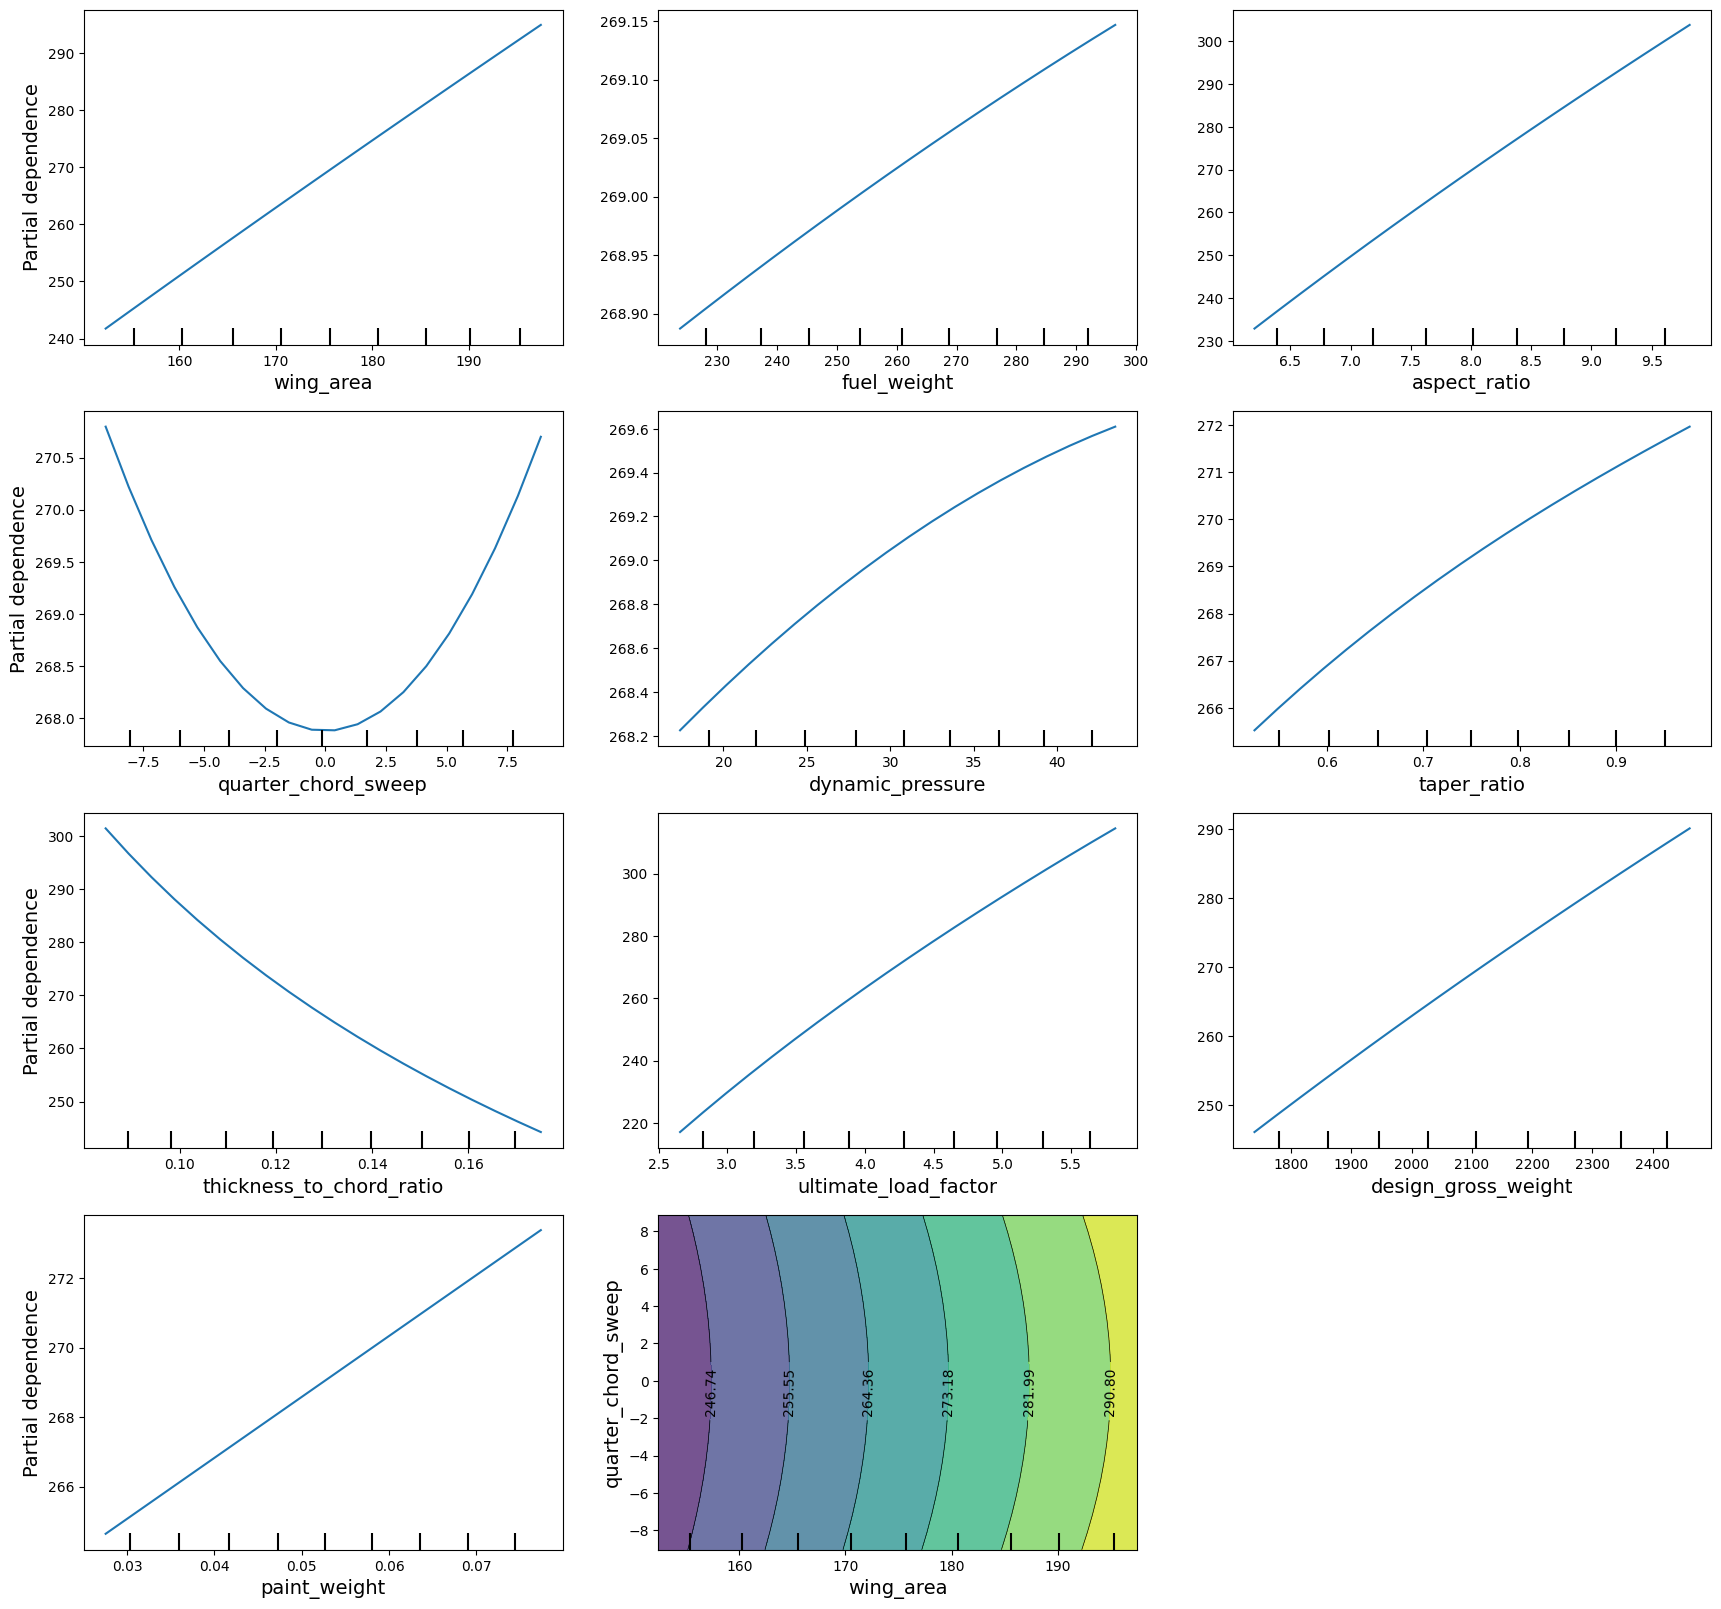

In [12]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, [0, 3]]
feature_names = ['wing_area', 'fuel_weight', 'aspect_ratio', 'quarter_chord_sweep', 
                 'dynamic_pressure', 'taper_ratio', 'thickness_to_chord_ratio',
                 'ultimate_load_factor', 'design_gross_weight', 'paint_weight']
pdd = PartialDependenceDisplay.from_surrogate_model(model, 
                                                    X_tr, 
                                                    features, 
                                                    grid_resolution=20, 
                                                    kind='average', 
                                                    feature_names=feature_names,
                                                    centered=False)

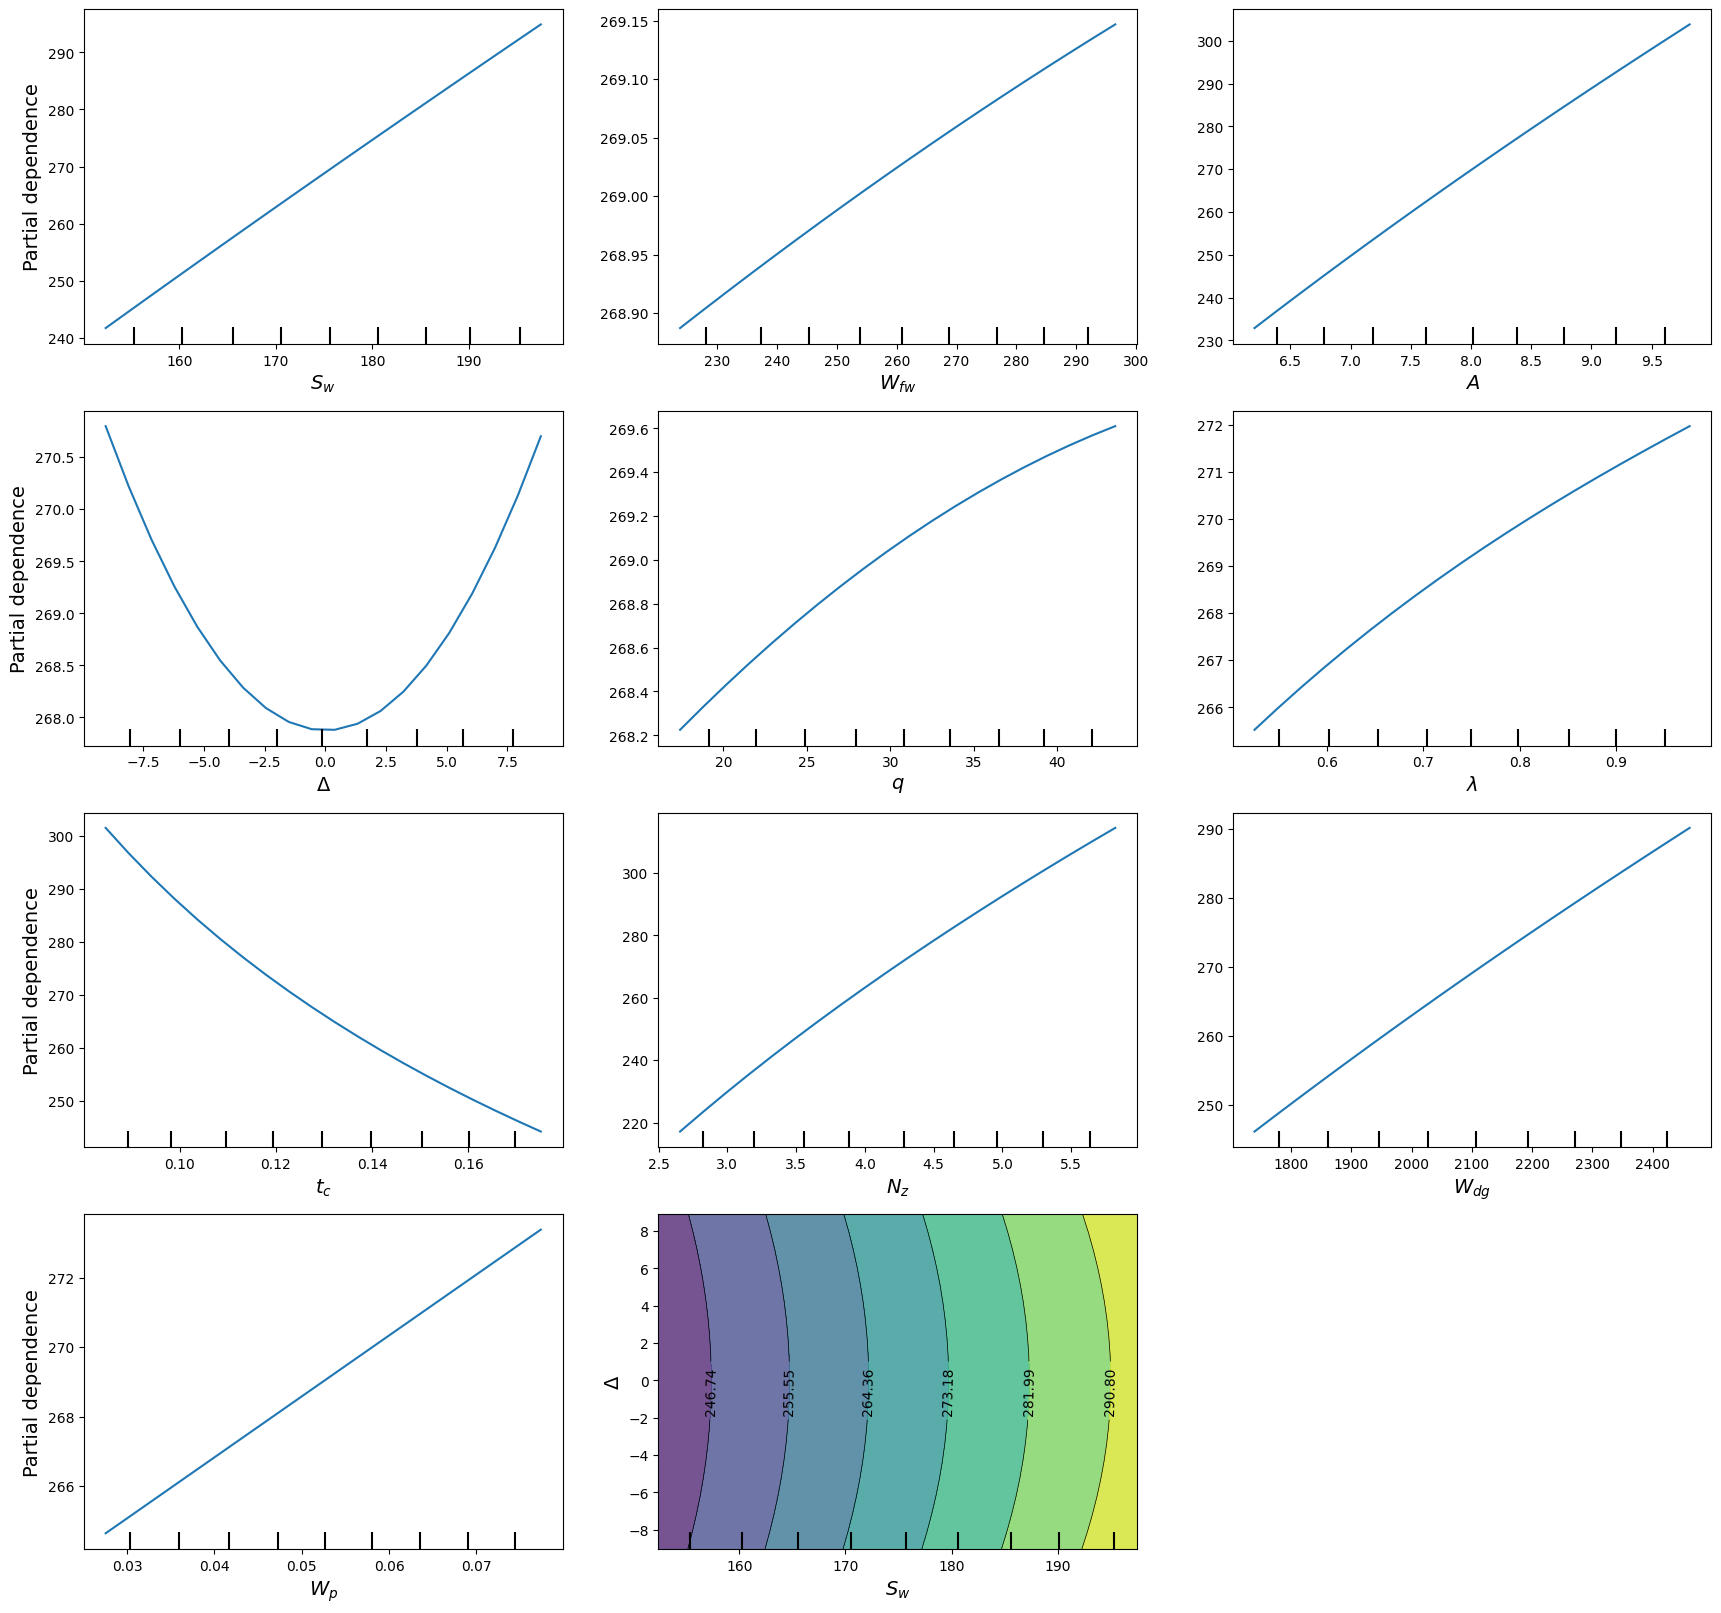

In [13]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, [0, 3]]
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']
pdd = PartialDependenceDisplay.from_surrogate_model(model, 
                                                    X_tr, 
                                                    features, 
                                                    grid_resolution=20, 
                                                    kind='average', 
                                                    feature_names=feature_names,
                                                    centered=False)

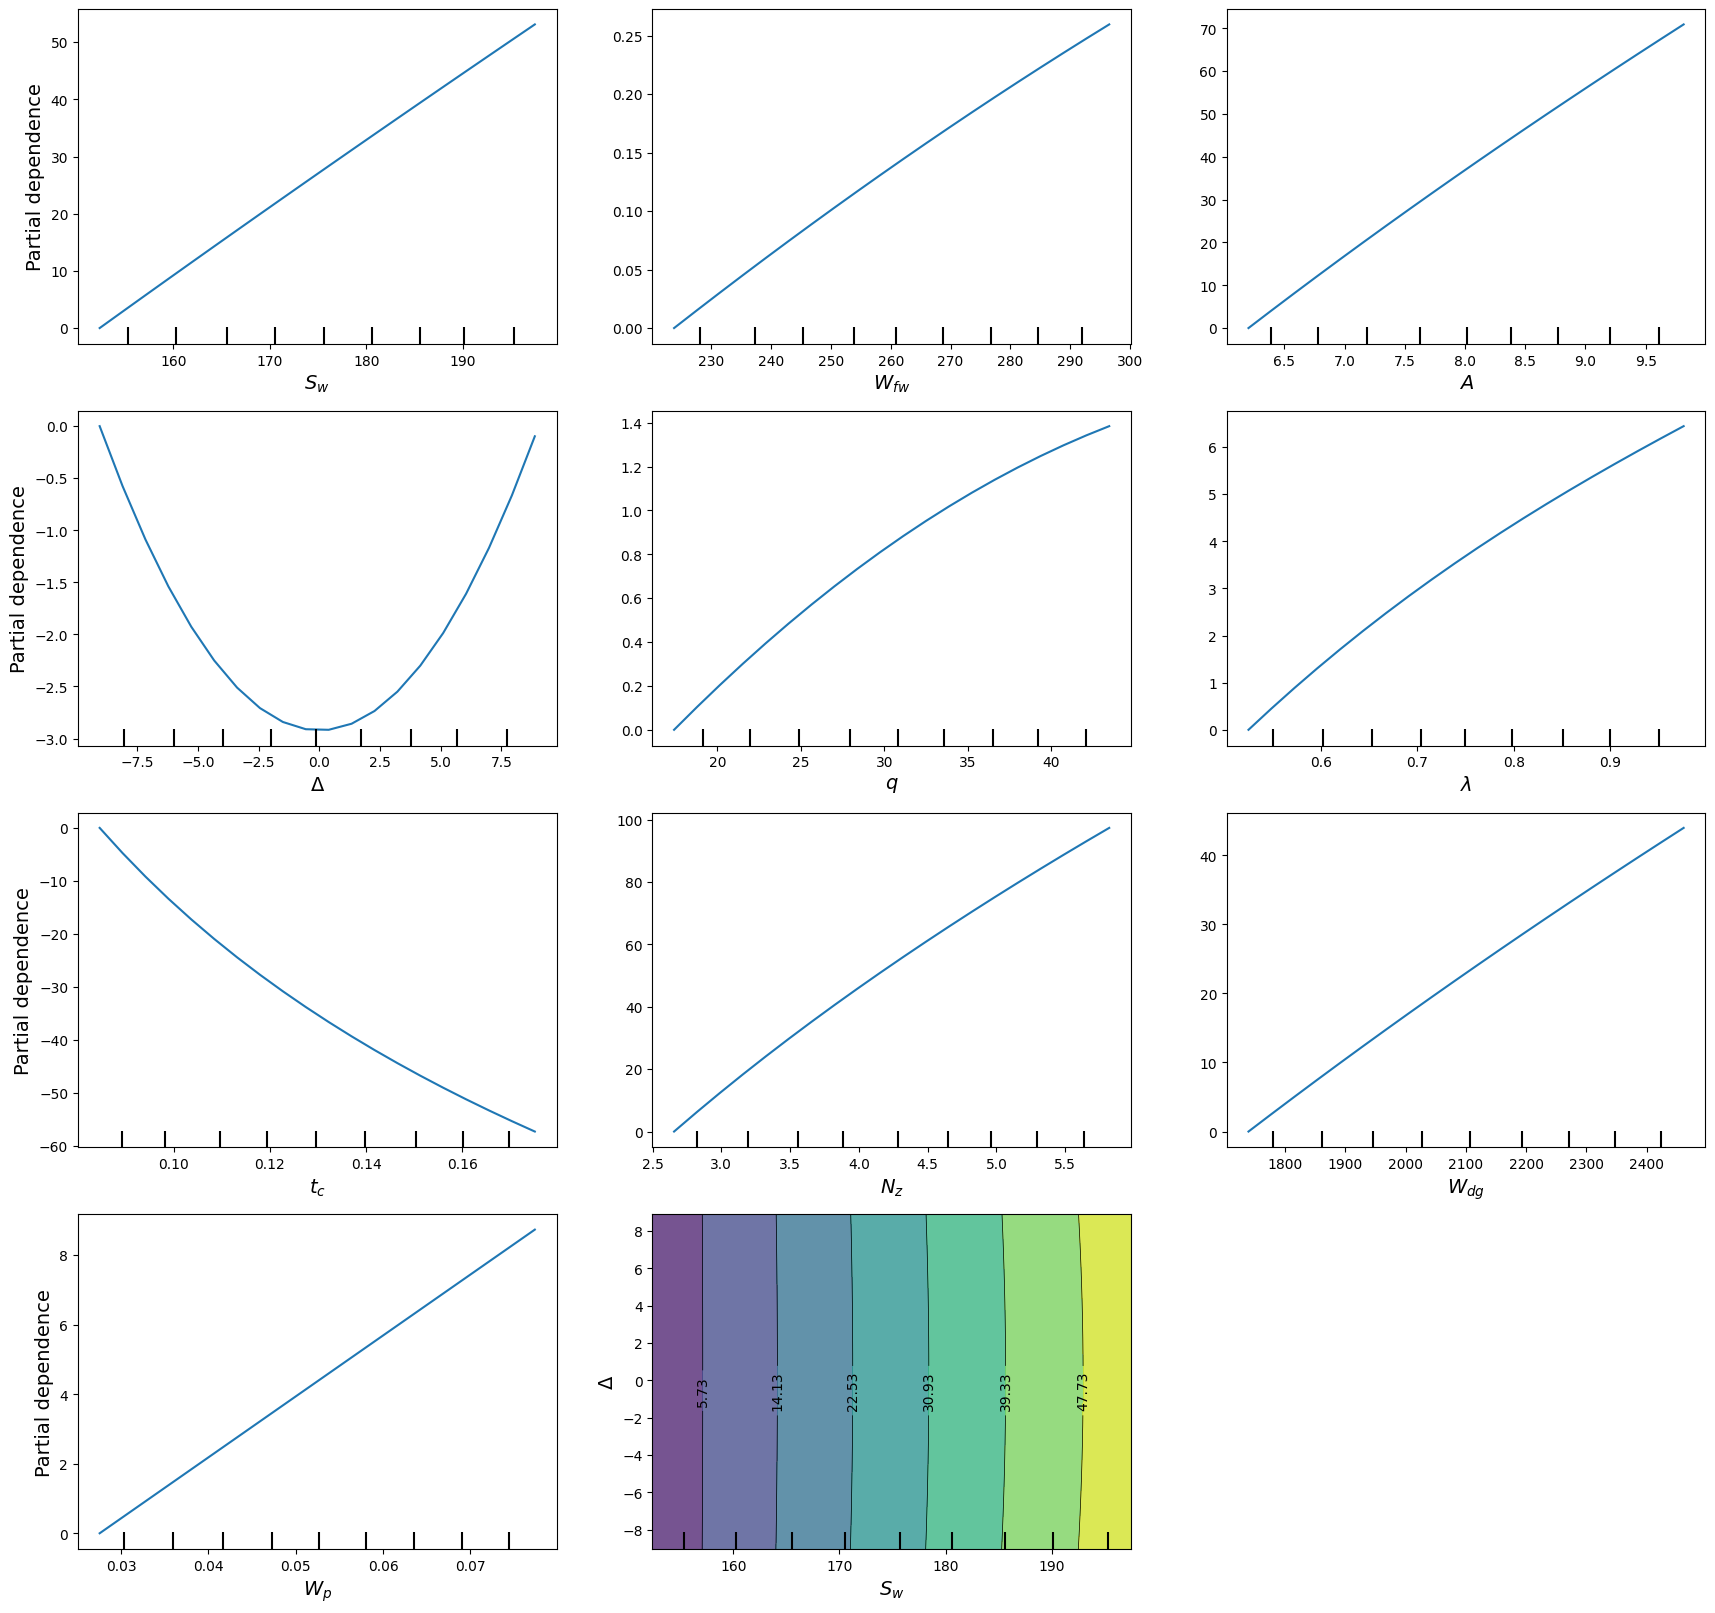

In [21]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, [0, 3]]
feature_names = [r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
                 r'$q$', r'$\lambda$', r'$t_{c}$',
                 r'$N_{z}$', r'$W_{dg}$', r'$W_{p}$']
pdd = PartialDependenceDisplay.from_surrogate_model(model, 
                                                    X_tr, 
                                                    features, 
                                                    grid_resolution=20, 
                                                    kind='average', 
                                                    feature_names=feature_names,
                                                    centered=True)

In [14]:
# model = rf_model
# features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# pdd = PartialDependenceDisplay.from_surrogate_model(model, X_tr, features, grid_resolution=20, kind='average', centered=False)

In [15]:
# # pdd = PartialDependenceDisplay(pd_results=pd_results)
# # pdd.plot()
# model = kriging_model
# features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# pdd = PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind='both', centered=True)

In [16]:
# model = kriging_model
# features = [0, 1, 2, 3, 8, (0, 8)]
# pdd = PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind='both', centered=True)

In [17]:
# model = kriging_model
# features = [0, 1, 2, 3, 8, (0, 8)]
# pdd= PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind='average')

In [18]:
# model = kriging_model
# features = [0, 1, 2, 3, 8, (0, 8)]
# pdd= PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind='average', centered=True)

In [19]:
# model = kriging_model
# features = [0, 1, 2, 3, 8, (0, 8)]
# pdd = PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind="individual")

In [20]:
# model = kriging_model
# features = [0, 1, 2, 3, 8, (0, 8)]
# pdd = PartialDependenceDisplay.from_surrogate_model(model, X, features, grid_resolution=20, kind="individual",
#                                                      centered=True)